In [4]:
#importing libraries  
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
import string 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from wordcloud import WordCloud
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
  
#importing libraries for model building and evaluation 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
  
from sklearn.metrics import classification_report, confusion_matrix 

In [5]:
# loading the datasets 
data = pd.read_csv('Sarcasm.csv')
data = data.drop(['index','sarcasm','irony','satire','understatement','overstatement','rhetorical_question'],axis=1)
  
# Display data 
print(data.head()) 

                                               tweet  sarcastic
0  The only thing I got from college is a caffein...          1
1  I love it when professors draw a big question ...          1
2  Remember the hundred emails from companies whe...          1
3  Today my pop-pop told me I was not “forced” to...          1
4  @VolphanCarol @littlewhitty @mysticalmanatee I...          1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      3467 non-null   object
 1   sarcastic  3468 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 54.3+ KB


C:\Users\qwekj\AppData\Local\Temp\ipykernel_22880\3977806891.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sarcastic', data=data, palette="Set1").set_title(


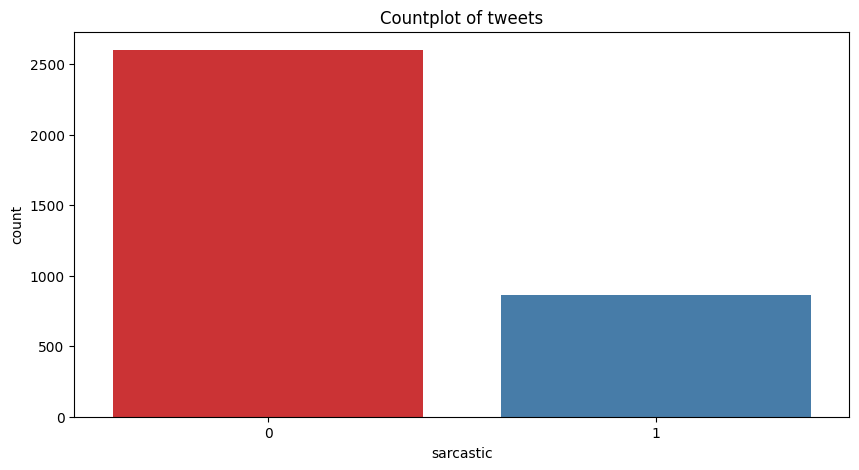

In [7]:
# Check the dataset label balance or not 
  
# Check number of tweets by sarcastic 
plt.figure(figsize=(10, 5)) 
sns.countplot(x='sarcastic', data=data, palette="Set1").set_title( 
    "Countplot of tweets") 
plt.show() 

In [8]:
stopwords_list = stopwords.words('english')

In [9]:
# Define a function to clean the text
def clean(text):
# Lowercase all letters, removes all mentions, special characters and numericals leaving the alphabets
    text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text)
    text = re.sub(r"#(\w+)", r"\1", text) # Removing just the "#" symbol from hashtags
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = text.lower()
    return text
    
data['tweet'] = data['tweet'].astype(str)
data['tweet'] = data['tweet'].apply(clean)
data.head()

,tweet,sarcastic
0,the only thing i got from college is a caffein...,1
1,i love it when professors draw a big question ...,1
2,remember the hundred emails from companies whe...,1
3,today my pop pop told me i was not forced to g...,1
4,i did too and i also reported cancun cruz not...,1


In [10]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

data['POS tagged'] = data['tweet'].apply(token_stop_pos)
data.head()

,tweet,sarcastic,POS tagged
0,the only thing i got from college is a caffein...,1,"[(thing, n), (got, v), (college, n), (caffeine..."
1,i love it when professors draw a big question ...,1,"[(love, v), (professors, n), (draw, v), (big, ..."
2,remember the hundred emails from companies whe...,1,"[(remember, v), (hundred, None), (emails, n), ..."
3,today my pop pop told me i was not forced to g...,1,"[(today, n), (pop, n), (pop, n), (told, v), (f..."
4,i did too and i also reported cancun cruz not...,1,"[(also, r), (reported, v), (cancun, n), (cruz,..."


In [11]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

data['Lemma'] = data['POS tagged'].apply(lemmatize)
data.head()

,tweet,sarcastic,POS tagged,Lemma
0,the only thing i got from college is a caffein...,1,"[(thing, n), (got, v), (college, n), (caffeine...",thing get college caffeine addiction
1,i love it when professors draw a big question ...,1,"[(love, v), (professors, n), (draw, v), (big, ...",love professor draw big question mark next a...
2,remember the hundred emails from companies whe...,1,"[(remember, v), (hundred, None), (emails, n), ...",remember hundred email company covid start g...
3,today my pop pop told me i was not forced to g...,1,"[(today, n), (pop, n), (pop, n), (told, v), (f...",today pop pop tell force go college okay sur...
4,i did too and i also reported cancun cruz not...,1,"[(also, r), (reported, v), (cancun, n), (cruz,...",also report cancun cruz worry heartbeat cons...


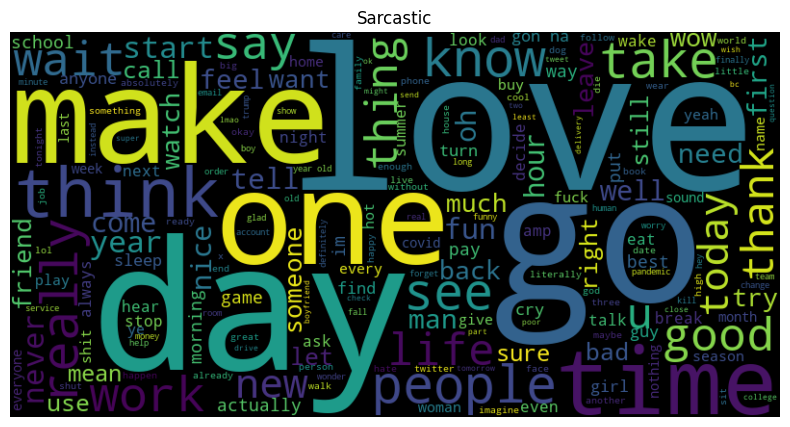

In [12]:
# Combine all sarcastic cleaned tweets into a single text 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
Sarcastic_text = ' '.join( 
    data['Lemma'][data['sarcastic'] == 1].tolist()) 
  
# Import the necessary libraries 
  
# Create a WordCloud object with specified width, height, and background color 
wordcloud = WordCloud(width=800, height=400, 
                      background_color='black').generate(Sarcastic_text) 
  
# Display the WordCloud without axes 
plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Sarcastic') 
plt.show() 

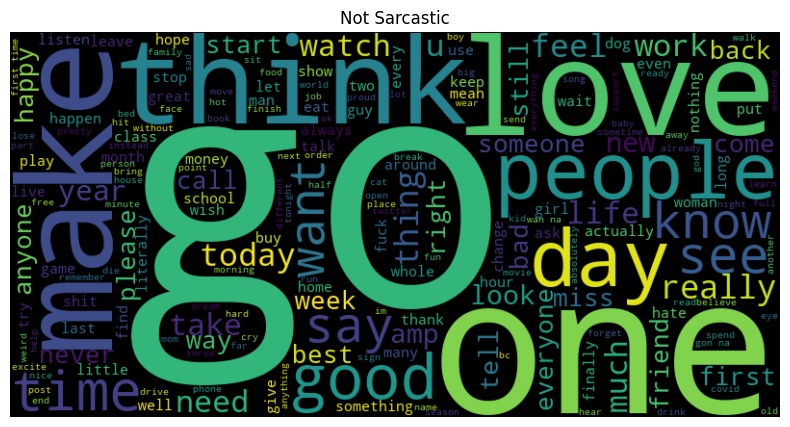

In [13]:
# Combine all non-sarcastic cleaned tweets into a single text 
Non_Sarcastic_text = ' '.join( 
    data['Lemma'][data['sarcastic'] == 0].tolist()) 
  
# Create a WordCloud object with specified width, height, and background color 
wordcloud = WordCloud(width=800, height=400, 
                      background_color='black').generate(Non_Sarcastic_text) 
  
# Display the WordCloud without axes 
plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Not Sarcastic') 
plt.show() 

In [14]:
data['sarcastic'].value_counts()

sarcastic
0    2601
1     867
Name: count, dtype: int64

In [15]:
X = data[['Lemma']]  
y = data['sarcastic']      

# Initialize RandomOverSampler
ros = RandomOverSampler()

# Perform Random OverSampling
X_resampled, y_resampled = ros.fit_resample(X.values.reshape(-1, 1), y)

# Convert the resampled data to a DataFrame
resampled_df = pd.DataFrame({'Lemma': X_resampled.flatten(), 'sarcastic': y_resampled})

# Check the new count of sarcastic
print(resampled_df['sarcastic'].value_counts())

sarcastic
1    2601
0    2601
Name: count, dtype: int64


In [16]:
resampled_df = resampled_df.sample(frac=1).reset_index(drop=True)

In [17]:
X = resampled_df['Lemma'].values
y = resampled_df['sarcastic'].values

In [18]:
# Split the data into training and test sets
X_train, X_combined, y_train, y_combined = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the test into test and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_combined, y_combined, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4161,)
X_val shape: (520,)
X_test shape: (521,)
y_train shape: (4161,)
y_val shape: (520,)
y_test shape: (521,)


In [19]:
# Set parameters 
# Max len of unique words 
vocab_size = 10000
  
# Embedding dimension value 
embedding_dim = 200
  
# Max length of sentence 
max_length = 60
  
# pad_sequences arg 
padding_type = 'post'
  
# Unknow words = <OOV> 
oov_tok = '<OOV>'
  
# Tokenizing and padding 
# Create a tokenizer with a specified vocabulary size and out-of-vocabulary token 
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) 
# Fit the tokenizer on the training text data to create word-to-index mapping 
tokenizer.fit_on_texts(X_train) 

In [20]:
# Get the word index from the tokenizer 
word_index = tokenizer.word_index 
  
#Printing the word_index 
word_index

{'<OOV>': 1,
 'get': 2,
 'like': 3,
 'go': 4,
 'love': 5,
 'day': 6,
 'time': 7,
 'one': 8,
 'make': 9,
 'think': 10,
 'people': 11,
 'know': 12,
 'see': 13,
 'year': 14,
 'good': 15,
 'really': 16,
 'say': 17,
 'take': 18,
 'work': 19,
 'life': 20,
 'thing': 21,
 'today': 22,
 'would': 23,
 'want': 24,
 'need': 25,
 'feel': 26,
 'new': 27,
 'watch': 28,
 'much': 29,
 'wait': 30,
 'start': 31,
 'never': 32,
 'back': 33,
 'every': 34,
 'come': 35,
 'look': 36,
 'tell': 37,
 'first': 38,
 'best': 39,
 'call': 40,
 'someone': 41,
 'amp': 42,
 'old': 43,
 'right': 44,
 'ever': 45,
 'try': 46,
 'even': 47,
 'leave': 48,
 'actually': 49,
 'hour': 50,
 'last': 51,
 'happy': 52,
 'anyone': 53,
 'week': 54,
 'na': 55,
 'way': 56,
 'friend': 57,
 'school': 58,
 'let': 59,
 'night': 60,
 'always': 61,
 'find': 62,
 'bad': 63,
 'something': 64,
 'still': 65,
 'put': 66,
 'could': 67,
 'well': 68,
 'play': 69,
 'home': 70,
 'fuck': 71,
 'give': 72,
 'wow': 73,
 'use': 74,
 'nice': 75,
 'talk': 76,


In [21]:
# Convert training text to sequences of word indices 
tokenizer.texts_to_sequences(X_train[:5])

[[1161, 2152, 3777, 19, 39, 1373, 144, 791, 296],
 [587, 653, 479, 1162, 120, 96, 264, 93],
 [12, 1666, 1374, 197, 719, 2761, 792, 87],
 [1002, 889, 176, 2153],
 [5, 390, 445, 720, 356, 1375, 47, 36, 514, 48]]

In [22]:
# Tokenize and pad data 
# Convert text data to sequences of word indices 
X_train_indices = tokenizer.texts_to_sequences(X_train) 
# Pad sequences to a fixed length 
X_train_padded = pad_sequences(X_train_indices, 
                             padding=padding_type, 
                             maxlen=max_length) 

In [23]:
# Convert validation text to sequences of word indices 
X_val_indices = tokenizer.texts_to_sequences(X_val) 
# Pad sequences to a fixed length 
X_validation_padded = pad_sequences(X_val_indices, 
                                  padding=padding_type, 
                                  maxlen=max_length) 
  
# Convert test text to sequences of word indices 
X_test_indices = tokenizer.texts_to_sequences(X_test) 
# Pad sequences to a fixed length 
X_test_padded = pad_sequences(X_test_indices, 
                            padding=padding_type, 
                            maxlen=max_length) 
  
# Check 
print('Training vector :', X_train_padded.shape) 
print('Validations vector :', X_validation_padded.shape) 
print('Testing vector :', X_test_padded.shape) 

Training vector : (4161, 60)
Validations vector : (520, 60)
Testing vector : (521, 60)


In [24]:
# Decode the sample training vector 
tokenizer.sequences_to_texts([X_train_padded[0].tolist()]) 

['manage personal budget work best invest money realise goal <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>']

In [25]:
# Prepare labels for model 
y_train_final = np.array(y_train) 
y_val_final = np.array(y_val) 
y_test_final = np.array(y_test) 
  
  
# Check shapes 
print('Training vector :', y_train_final.shape) 
print('Validations vector :', y_val_final.shape) 
print('Testing vector :', y_test_final.shape) 

Training vector : (4161,)
Validations vector : (520,)
Testing vector : (521,)


In [26]:
# Import the TensorFlow library 
import tensorflow as tf 
  
# Define a sequential neural network model 
model = tf.keras.Sequential([ 
    # Embedding layer for creating word embeddings 
    tf.keras.layers.Embedding(vocab_size, embedding_dim), 
  
    # GlobalMaxPooling layer to extract relevant features 
    tf.keras.layers.GlobalMaxPool1D(), 
  
    # First Dense layer with 40 neurons and ReLU activation 
    tf.keras.layers.Dense(40, activation='relu'), 
  
    # Dropout layer to prevent overfitting 
    tf.keras.layers.Dropout(0.5), 
  
    # Second Dense layer with 20 neurons and ReLU activation 
    tf.keras.layers.Dense(20, activation='relu'), 
  
    # Dropout layer to prevent overfitting 
    tf.keras.layers.Dropout(0.5), 
  
    # Third Dense layer with 10 neurons and ReLU activation 
    tf.keras.layers.Dense(10, activation='relu'), 
  
    # Dropout layer to prevent overfitting 
    tf.keras.layers.Dropout(0.2), 
  
    # Final Dense layer with 1 neuron and sigmoid activation for binary classification 
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compile the model with specified loss function, optimizer, and evaluation metrics 
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy']) 

In [28]:
# Set the number of training epochs 
num_epochs = 5
  
# Fit the model to the training data and validate on the validation data 
history = model.fit( 
    X_train_padded, y_train_final, 
    epochs=num_epochs, 
    validation_data=(X_validation_padded, y_val_final) 
) 

Epoch 1/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.5133 - loss: 0.6946 - val_accuracy: 0.5385 - val_loss: 0.6879
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5686 - loss: 0.6809 - val_accuracy: 0.7346 - val_loss: 0.6288
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7632 - loss: 0.5490 - val_accuracy: 0.8481 - val_loss: 0.3752
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9357 - loss: 0.2239 - val_accuracy: 0.8615 - val_loss: 0.3982
Epoch 5/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9727 - loss: 0.0971 - val_accuracy: 0.8712 - val_loss: 0.4603


In [29]:
#predicting the model  
  
y_pred_prob = model.predict(X_test_padded) 
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred_prob] 
y_pred[:5]

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[0, 0, 1, 0, 1]

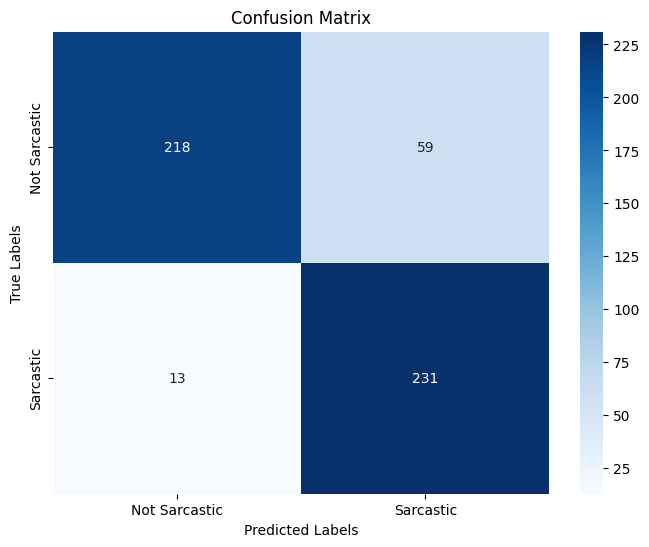

In [30]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_final, y_pred) 
  
# Plot the confusion matrix using a heatmap 
plt.figure(figsize=(8, 6)) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Sarcastic', 'Sarcastic'], 
            yticklabels=['Not Sarcastic', 'Sarcastic']) 
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels') 
plt.title('Confusion Matrix') 
plt.show() 

In [31]:
# Print Classification Report 
print("\nClassification Report:") 
print(classification_report(y_test_final, y_pred, 
                            target_names=['Not Sarcastic', 'Sarcastic']))


Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.94      0.79      0.86       277
    Sarcastic       0.80      0.95      0.87       244

     accuracy                           0.86       521
    macro avg       0.87      0.87      0.86       521
 weighted avg       0.87      0.86      0.86       521



To predict models

In [32]:
tweetdata = pd.read_csv('preprocessed_data.csv',dtype=object)

In [33]:
tweetdata.head()

,id,createdAt,fullName,userName,profileImage,fullText,replyTo,lang,quoteCount,retweetCount,replyCount,likeCount,viewCount,sentimentLabel1,sentimentLabel2,sentimentLabel3,sentimentLabelFinal,cleaned_tweet,cleaned_tweet_vader,tokens
0,1773239429001355776,2024-03-28 06:43:19+00:00,Stella Patchouli,StellaPatch,https://pbs.twimg.com/profile_images/175397939...,@nytimes The curse on Musk iis working!\r\n🔥☔🐱🐱🤹💥,1772931578835939584,en,0,0,0,0,9,0,1,NaN,NaN,the curse on musk iis working,curse musk iis working,"['the', 'curse', 'on', 'musk', 'ii', 'working']"
1,1772992490213097728,2024-03-27 14:22:04+00:00,Boston Strong 🍀,bostonstronggg,https://pbs.twimg.com/profile_images/174182833...,@Sp4rksaflyin @nytimes These Electric Tesla ca...,1772942184456614144,en,0,0,0,0,12,0,0,NaN,NaN,these electric tesla cars cannot start in the ...,electric tesla cars start new england cold fri...,"['these', 'electric', 'tesla', 'car', 'cannot'..."
2,1772955972987711744,2024-03-27 11:56:58+00:00,"Don't Start, Won't Be",GetBackToNo,https://pbs.twimg.com/profile_images/134400549...,@nytimes Is there something wrong with the Chi...,1772931578835939584,en,0,0,0,1,13,0,1,NaN,NaN,is there something wrong with the chinese comm...,something wrong chinese communist party,"['is', 'there', 'something', 'wrong', 'with', ..."
3,1772945946961146368,2024-03-27 11:17:08+00:00,novus locus,HuttonRich55685,https://pbs.twimg.com/profile_images/170782492...,@nytimes I love my Chinese IPhone. Thank you c...,1772931578835939584,en,0,0,0,2,87,1,2,NaN,NaN,i love my chinese iphone thank you comrade apple,love chinese iphone thank comrade apple,"['i', 'love', 'my', 'chinese', 'iphone', 'than..."
4,1772945888656421120,2024-03-27 11:16:54+00:00,Politics Barn,PoliticsBarn,https://pbs.twimg.com/profile_images/119881591...,@nytimes And we can read all about it on our m...,1772931578835939584,en,0,0,0,3,35,1,1,NaN,NaN,and we can read all about it on our madeinchin...,read madeinchina devices,"['and', 'we', 'can', 'read', 'all', 'about', '..."


In [34]:
tweetdata = tweetdata[tweetdata['replyTo'].notna()]

tweetdata.head()

,id,createdAt,fullName,userName,profileImage,fullText,replyTo,lang,quoteCount,retweetCount,replyCount,likeCount,viewCount,sentimentLabel1,sentimentLabel2,sentimentLabel3,sentimentLabelFinal,cleaned_tweet,cleaned_tweet_vader,tokens
0,1773239429001355776,2024-03-28 06:43:19+00:00,Stella Patchouli,StellaPatch,https://pbs.twimg.com/profile_images/175397939...,@nytimes The curse on Musk iis working!\r\n🔥☔🐱🐱🤹💥,1772931578835939584,en,0,0,0,0,9,0,1,NaN,NaN,the curse on musk iis working,curse musk iis working,"['the', 'curse', 'on', 'musk', 'ii', 'working']"
1,1772992490213097728,2024-03-27 14:22:04+00:00,Boston Strong 🍀,bostonstronggg,https://pbs.twimg.com/profile_images/174182833...,@Sp4rksaflyin @nytimes These Electric Tesla ca...,1772942184456614144,en,0,0,0,0,12,0,0,NaN,NaN,these electric tesla cars cannot start in the ...,electric tesla cars start new england cold fri...,"['these', 'electric', 'tesla', 'car', 'cannot'..."
2,1772955972987711744,2024-03-27 11:56:58+00:00,"Don't Start, Won't Be",GetBackToNo,https://pbs.twimg.com/profile_images/134400549...,@nytimes Is there something wrong with the Chi...,1772931578835939584,en,0,0,0,1,13,0,1,NaN,NaN,is there something wrong with the chinese comm...,something wrong chinese communist party,"['is', 'there', 'something', 'wrong', 'with', ..."
3,1772945946961146368,2024-03-27 11:17:08+00:00,novus locus,HuttonRich55685,https://pbs.twimg.com/profile_images/170782492...,@nytimes I love my Chinese IPhone. Thank you c...,1772931578835939584,en,0,0,0,2,87,1,2,NaN,NaN,i love my chinese iphone thank you comrade apple,love chinese iphone thank comrade apple,"['i', 'love', 'my', 'chinese', 'iphone', 'than..."
4,1772945888656421120,2024-03-27 11:16:54+00:00,Politics Barn,PoliticsBarn,https://pbs.twimg.com/profile_images/119881591...,@nytimes And we can read all about it on our m...,1772931578835939584,en,0,0,0,3,35,1,1,NaN,NaN,and we can read all about it on our madeinchin...,read madeinchina devices,"['and', 'we', 'can', 'read', 'all', 'about', '..."


In [51]:
tweetdata['cleaned_tweet'] = tweetdata['fullText'].astype(str)
tweetdata['cleaned_tweet'] = tweetdata['fullText'].apply(clean)

In [35]:
tweetdata['POS tagged'] = tweetdata['cleaned_tweet'].apply(token_stop_pos)
tweetdata.head()

,id,createdAt,fullName,userName,profileImage,fullText,replyTo,lang,quoteCount,retweetCount,...,likeCount,viewCount,sentimentLabel1,sentimentLabel2,sentimentLabel3,sentimentLabelFinal,cleaned_tweet,cleaned_tweet_vader,tokens,POS tagged
0,1773239429001355776,2024-03-28 06:43:19+00:00,Stella Patchouli,StellaPatch,https://pbs.twimg.com/profile_images/175397939...,@nytimes The curse on Musk iis working!\r\n🔥☔🐱🐱🤹💥,1772931578835939584,en,0,0,...,0,9,0,1,NaN,NaN,the curse on musk iis working,curse musk iis working,"['the', 'curse', 'on', 'musk', 'ii', 'working']","[(curse, n), (musk, n), (iis, n), (working, v)]"
1,1772992490213097728,2024-03-27 14:22:04+00:00,Boston Strong 🍀,bostonstronggg,https://pbs.twimg.com/profile_images/174182833...,@Sp4rksaflyin @nytimes These Electric Tesla ca...,1772942184456614144,en,0,0,...,0,12,0,0,NaN,NaN,these electric tesla cars cannot start in the ...,electric tesla cars start new england cold fri...,"['these', 'electric', 'tesla', 'car', 'cannot'...","[(electric, a), (tesla, n), (cars, n), (start,..."
2,1772955972987711744,2024-03-27 11:56:58+00:00,"Don't Start, Won't Be",GetBackToNo,https://pbs.twimg.com/profile_images/134400549...,@nytimes Is there something wrong with the Chi...,1772931578835939584,en,0,0,...,1,13,0,1,NaN,NaN,is there something wrong with the chinese comm...,something wrong chinese communist party,"['is', 'there', 'something', 'wrong', 'with', ...","[(something, n), (wrong, a), (chinese, a), (co..."
3,1772945946961146368,2024-03-27 11:17:08+00:00,novus locus,HuttonRich55685,https://pbs.twimg.com/profile_images/170782492...,@nytimes I love my Chinese IPhone. Thank you c...,1772931578835939584,en,0,0,...,2,87,1,2,NaN,NaN,i love my chinese iphone thank you comrade apple,love chinese iphone thank comrade apple,"['i', 'love', 'my', 'chinese', 'iphone', 'than...","[(love, v), (chinese, a), (iphone, n), (thank,..."
4,1772945888656421120,2024-03-27 11:16:54+00:00,Politics Barn,PoliticsBarn,https://pbs.twimg.com/profile_images/119881591...,@nytimes And we can read all about it on our m...,1772931578835939584,en,0,0,...,3,35,1,1,NaN,NaN,and we can read all about it on our madeinchin...,read madeinchina devices,"['and', 'we', 'can', 'read', 'all', 'about', '...","[(read, v), (madeinchina, n), (devices, n)]"


In [36]:
tweetdata['Lemma'] = tweetdata['POS tagged'].apply(lemmatize)
tweetdata.head()

,id,createdAt,fullName,userName,profileImage,fullText,replyTo,lang,quoteCount,retweetCount,...,viewCount,sentimentLabel1,sentimentLabel2,sentimentLabel3,sentimentLabelFinal,cleaned_tweet,cleaned_tweet_vader,tokens,POS tagged,Lemma
0,1773239429001355776,2024-03-28 06:43:19+00:00,Stella Patchouli,StellaPatch,https://pbs.twimg.com/profile_images/175397939...,@nytimes The curse on Musk iis working!\r\n🔥☔🐱🐱🤹💥,1772931578835939584,en,0,0,...,9,0,1,NaN,NaN,the curse on musk iis working,curse musk iis working,"['the', 'curse', 'on', 'musk', 'ii', 'working']","[(curse, n), (musk, n), (iis, n), (working, v)]",curse musk ii work
1,1772992490213097728,2024-03-27 14:22:04+00:00,Boston Strong 🍀,bostonstronggg,https://pbs.twimg.com/profile_images/174182833...,@Sp4rksaflyin @nytimes These Electric Tesla ca...,1772942184456614144,en,0,0,...,12,0,0,NaN,NaN,these electric tesla cars cannot start in the ...,electric tesla cars start new england cold fri...,"['these', 'electric', 'tesla', 'car', 'cannot'...","[(electric, a), (tesla, n), (cars, n), (start,...",electric tesla car start new england cold fr...
2,1772955972987711744,2024-03-27 11:56:58+00:00,"Don't Start, Won't Be",GetBackToNo,https://pbs.twimg.com/profile_images/134400549...,@nytimes Is there something wrong with the Chi...,1772931578835939584,en,0,0,...,13,0,1,NaN,NaN,is there something wrong with the chinese comm...,something wrong chinese communist party,"['is', 'there', 'something', 'wrong', 'with', ...","[(something, n), (wrong, a), (chinese, a), (co...",something wrong chinese communist party
3,1772945946961146368,2024-03-27 11:17:08+00:00,novus locus,HuttonRich55685,https://pbs.twimg.com/profile_images/170782492...,@nytimes I love my Chinese IPhone. Thank you c...,1772931578835939584,en,0,0,...,87,1,2,NaN,NaN,i love my chinese iphone thank you comrade apple,love chinese iphone thank comrade apple,"['i', 'love', 'my', 'chinese', 'iphone', 'than...","[(love, v), (chinese, a), (iphone, n), (thank,...",love chinese iphone thank comrade apple
4,1772945888656421120,2024-03-27 11:16:54+00:00,Politics Barn,PoliticsBarn,https://pbs.twimg.com/profile_images/119881591...,@nytimes And we can read all about it on our m...,1772931578835939584,en,0,0,...,35,1,1,NaN,NaN,and we can read all about it on our madeinchin...,read madeinchina devices,"['and', 'we', 'can', 'read', 'all', 'about', '...","[(read, v), (madeinchina, n), (devices, n)]",read madeinchina device


In [37]:
tokenizer.fit_on_texts(tweetdata['Lemma'])

In [38]:
# Tokenize and pad data 
# Convert text data to sequences of word indices 
tweets_indices = tokenizer.texts_to_sequences(tweetdata['Lemma']) 
# Pad sequences to a fixed length 
tweets_padded = pad_sequences(tweets_indices, 
                             padding=padding_type)

In [39]:
#predicting the model  
  
tweets_pred_prob = model.predict(tweets_padded) 
tweets_pred = [1 if prob >= 0.5 else 0 for prob in tweets_pred_prob] 
tweets_pred[:5]

8975/8975 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


[0, 0, 0, 1, 1]

In [40]:
tweetdata['sarcastic'] = tweets_pred

tweetdata.head()

,id,createdAt,fullName,userName,profileImage,fullText,replyTo,lang,quoteCount,retweetCount,...,sentimentLabel1,sentimentLabel2,sentimentLabel3,sentimentLabelFinal,cleaned_tweet,cleaned_tweet_vader,tokens,POS tagged,Lemma,sarcastic
0,1773239429001355776,2024-03-28 06:43:19+00:00,Stella Patchouli,StellaPatch,https://pbs.twimg.com/profile_images/175397939...,@nytimes The curse on Musk iis working!\r\n🔥☔🐱🐱🤹💥,1772931578835939584,en,0,0,...,0,1,NaN,NaN,the curse on musk iis working,curse musk iis working,"['the', 'curse', 'on', 'musk', 'ii', 'working']","[(curse, n), (musk, n), (iis, n), (working, v)]",curse musk ii work,0
1,1772992490213097728,2024-03-27 14:22:04+00:00,Boston Strong 🍀,bostonstronggg,https://pbs.twimg.com/profile_images/174182833...,@Sp4rksaflyin @nytimes These Electric Tesla ca...,1772942184456614144,en,0,0,...,0,0,NaN,NaN,these electric tesla cars cannot start in the ...,electric tesla cars start new england cold fri...,"['these', 'electric', 'tesla', 'car', 'cannot'...","[(electric, a), (tesla, n), (cars, n), (start,...",electric tesla car start new england cold fr...,0
2,1772955972987711744,2024-03-27 11:56:58+00:00,"Don't Start, Won't Be",GetBackToNo,https://pbs.twimg.com/profile_images/134400549...,@nytimes Is there something wrong with the Chi...,1772931578835939584,en,0,0,...,0,1,NaN,NaN,is there something wrong with the chinese comm...,something wrong chinese communist party,"['is', 'there', 'something', 'wrong', 'with', ...","[(something, n), (wrong, a), (chinese, a), (co...",something wrong chinese communist party,0
3,1772945946961146368,2024-03-27 11:17:08+00:00,novus locus,HuttonRich55685,https://pbs.twimg.com/profile_images/170782492...,@nytimes I love my Chinese IPhone. Thank you c...,1772931578835939584,en,0,0,...,1,2,NaN,NaN,i love my chinese iphone thank you comrade apple,love chinese iphone thank comrade apple,"['i', 'love', 'my', 'chinese', 'iphone', 'than...","[(love, v), (chinese, a), (iphone, n), (thank,...",love chinese iphone thank comrade apple,1
4,1772945888656421120,2024-03-27 11:16:54+00:00,Politics Barn,PoliticsBarn,https://pbs.twimg.com/profile_images/119881591...,@nytimes And we can read all about it on our m...,1772931578835939584,en,0,0,...,1,1,NaN,NaN,and we can read all about it on our madeinchin...,read madeinchina devices,"['and', 'we', 'can', 'read', 'all', 'about', '...","[(read, v), (madeinchina, n), (devices, n)]",read madeinchina device,1


In [41]:
#finaldata = tweetdata.drop(['cleaned_tweet','POS tagged','Lemma'],axis=1)
finaldata = tweetdata.drop(['POS tagged','Lemma'],axis=1)

finaldata.head()

,id,createdAt,fullName,userName,profileImage,fullText,replyTo,lang,quoteCount,retweetCount,...,likeCount,viewCount,sentimentLabel1,sentimentLabel2,sentimentLabel3,sentimentLabelFinal,cleaned_tweet,cleaned_tweet_vader,tokens,sarcastic
0,1773239429001355776,2024-03-28 06:43:19+00:00,Stella Patchouli,StellaPatch,https://pbs.twimg.com/profile_images/175397939...,@nytimes The curse on Musk iis working!\r\n🔥☔🐱🐱🤹💥,1772931578835939584,en,0,0,...,0,9,0,1,NaN,NaN,the curse on musk iis working,curse musk iis working,"['the', 'curse', 'on', 'musk', 'ii', 'working']",0
1,1772992490213097728,2024-03-27 14:22:04+00:00,Boston Strong 🍀,bostonstronggg,https://pbs.twimg.com/profile_images/174182833...,@Sp4rksaflyin @nytimes These Electric Tesla ca...,1772942184456614144,en,0,0,...,0,12,0,0,NaN,NaN,these electric tesla cars cannot start in the ...,electric tesla cars start new england cold fri...,"['these', 'electric', 'tesla', 'car', 'cannot'...",0
2,1772955972987711744,2024-03-27 11:56:58+00:00,"Don't Start, Won't Be",GetBackToNo,https://pbs.twimg.com/profile_images/134400549...,@nytimes Is there something wrong with the Chi...,1772931578835939584,en,0,0,...,1,13,0,1,NaN,NaN,is there something wrong with the chinese comm...,something wrong chinese communist party,"['is', 'there', 'something', 'wrong', 'with', ...",0
3,1772945946961146368,2024-03-27 11:17:08+00:00,novus locus,HuttonRich55685,https://pbs.twimg.com/profile_images/170782492...,@nytimes I love my Chinese IPhone. Thank you c...,1772931578835939584,en,0,0,...,2,87,1,2,NaN,NaN,i love my chinese iphone thank you comrade apple,love chinese iphone thank comrade apple,"['i', 'love', 'my', 'chinese', 'iphone', 'than...",1
4,1772945888656421120,2024-03-27 11:16:54+00:00,Politics Barn,PoliticsBarn,https://pbs.twimg.com/profile_images/119881591...,@nytimes And we can read all about it on our m...,1772931578835939584,en,0,0,...,3,35,1,1,NaN,NaN,and we can read all about it on our madeinchin...,read madeinchina devices,"['and', 'we', 'can', 'read', 'all', 'about', '...",1


In [42]:
finaldata.to_csv('sarcasmTweets.csv', index = False)

In [32]:
model.save("sarcasm_detect.keras") #save model to disk to use in another notebook